<a href="https://colab.research.google.com/github/gyesibiney/Career-Accelerator-LP5-Sentinent-Analysis/blob/main/EDA_lp5__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Hugging Face

A vaccination is a biological preparation that offers active acquired protection to a specific infectious disease.

Humans have been searching for means of defending one another against fatal diseases for generations. Immunization has a long history, ranging from experimentation and calculated risks to a global vaccine roll-out in the midst of an extraordinary pandemic.

Some of the trials done in the past to produce vaccines would not be ethically acceptable in the present, and vaccination research can generate difficult ethical issues. More lives have been saved by vaccines than by any other medical discovery in history.One of the most important medical developments in public health has been the development of vaccines, which have prevented millions of deaths and decreased the prevalence of numerous infectious diseases globally. They have been essential in the eradication or control of numerous illnesses, including measles, polio, smallpox, and others. Although the precise efficiency and safety profile of a vaccine depends on the vaccine in question and the disease it is intended to prevent, vaccination is generally safe and very effective.

objectives:

Creating a machine learning model to determine if a Twitter tweet on vaccinations is favorable, neutral, or negative is the goal of this challenge. This technology could assist governments and other public health actors in monitoring public opinion about the COVID-19 vaccine and assist in enhancing global vaccination programs, vaccine communication tactics, and public health policy.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install datasets

In [ ]:
pip install transformers[torch]

In [ ]:
pip install emoji

In [ ]:
pip install accelerate -U

In [ ]:
pip install transformers

In [ ]:
pip install nltk

Hugging Face is an open-source and platform provider of machine learning technologies. You can use install their package to access some interesting pre-built models to use them directly or to fine-tune (retrain it on your dataset leveraging the prior knowledge coming with the first training), then host your trained models on the platform, so that you may use them later on other devices and apps.

Please, [go to the website and sign-in](https://huggingface.co/) to access all the features of the platform.

[Read more about Text classification with Hugging Face](https://huggingface.co/tasks/text-classification)

The Hugging face models are Deep Learning based, so will need a lot of computational GPU power to train them. Please use [Colab](https://colab.research.google.com/) to do it, or your other GPU cloud provider, or a local machine having NVIDIA GPU.

## Application of Hugging Face Text classification model Fune-tuning

In [ ]:
import os
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import emoji
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

from matplotlib import axes
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import re,string, unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import string

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

import torch
import torch.nn.functional as F


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Find below a simple example, with just `3 epochs of fine-tuning`.

Read more about the fine-tuning concept : [here](https://deeplizard.com/learn/video/5T-iXNNiwIs#:~:text=Fine%2Dtuning%20is%20a%20way,perform%20a%20second%20similar%20task.)

In [ ]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
# Load the dataset and display some values
df_train= pd.read_csv("/content/drive/MyDrive/data/Train.csv")
df_test= pd.read_csv("/content/drive/MyDrive/data/Test.csv")




In [ ]:
df_train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
df_test.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


# 1. EXPLORATORY DATA ANALYSIS

## Univariate Analysis

In [ ]:
# checking for info on the datasets
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f"the info {name} dataset are: \n\n",dataset.info(),"\n" + "---" * 15)
   # print(dataset.info())
    #print("\n" + "---" * 15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB
the info df_train dataset are: 

 None 
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5177 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 81.0+ KB
the info df_test dataset are: 

 None 
---------------------------------------------


## i. checking for missing values

In [ ]:
# checking for missing values in the datasets
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f"the info {name} dataset are: \n\n",dataset.isna().sum(),"\n" + "---" * 15)

the info df_train dataset are: 

 tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64 
---------------------------------------------
the info df_test dataset are: 

 tweet_id     0
safe_text    1
dtype: int64 
---------------------------------------------


In [ ]:
# checking for the shapes of the datasets
print(df_train.shape, df_test.shape)

(10001, 4) (5177, 2)


In [ ]:
# handling missing values
# A way to eliminate rows containing NaN values
df_train = df_train[~df_train.isna().any(axis=1)]
df_test = df_test[~df_test.isna().any(axis=1)]

In [ ]:
# checking for missing values in the datasets again
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f"the info {name} dataset are: \n\n",dataset.isna().sum(),"\n" + "---" * 15)

the info df_train dataset are: 

 tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64 
---------------------------------------------
the info df_test dataset are: 

 tweet_id     0
safe_text    0
dtype: int64 
---------------------------------------------


##ii. statistical distributions of the numerical features in the datasets

In [ ]:
data = {'df_train': df_train, 'df_test': df_test}

#Create a for loop that iterates over the elements in the data and stats lists simultaneously using zip(data, stats).
for name, dataset in data.items():
  print(f'The statistical description of the' ,name, "dataset :", "\n\n", dataset.describe().T,"\n\n","---"*25);

The statistical description of the df_train dataset : 

             count      mean       std       min       25%  50%  75%  max
label      9999.0  0.301530  0.646740 -1.000000  0.000000  0.0  1.0  1.0
agreement  9999.0  0.854252  0.180707  0.333333  0.666667  1.0  1.0  1.0 

 ---------------------------------------------------------------------------
The statistical description of the df_test dataset : 

           count unique                                                top freq
tweet_id   5176   5176                                           00BHHHP1    1
safe_text  5176   5061  <user> #GOP STOP blaming #Immigrants first #Eb...    9 

 ---------------------------------------------------------------------------


In [ ]:
# checking for info on the datasets
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f"the info {name} dataset are: \n\n",dataset.info(),"\n" + "---" * 15)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   safe_text  9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB
the info df_train dataset are: 

 None 
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5176 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5176 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 121.3+ KB
the info df_test dataset are: 

 None 
---------------------------------------------


##Distribution

The distribution of the df_train dataset:


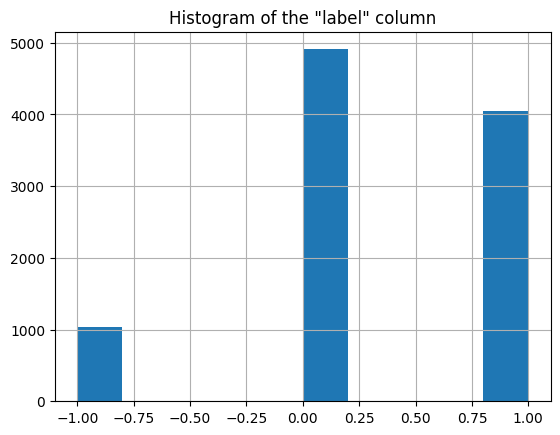

---------------------------------------------------------------------------
The distribution of the df_test dataset:
The dataset does not contain the "label" column.
---------------------------------------------------------------------------


In [ ]:
data = {'df_train': df_train, 'df_test': df_test}
for name, dataset in data.items():
    print(f'The distribution of the {name} dataset:')
    if 'label' in dataset.columns:
        dataset['label'].hist()
        plt.title('Histogram of the "label" column')
        plt.show()
    else:
        print('The dataset does not contain the "label" column.')
    print("---" * 25)


##iii. Check for duplicates

In [ ]:
#Check for duplicates
duplicate_rows_train = df_train['safe_text'].duplicated().sum()
duplicate_rows_test = df_test['safe_text'].duplicated().sum()
print('There are ',duplicate_rows_train,' duplicated rows for the training set')
print('There are ',duplicate_rows_test,' duplicated rows for the test set')

There are  343  duplicated rows for the training set
There are  115  duplicated rows for the test set


In [ ]:
df_train[df_train['safe_text'].duplicated()]

,tweet_id,safe_text,label,agreement
134,35H36EY6,"Study of more than 95,000 kids finds no link b...",1.0,1.000000
360,LNA7G7AF,<user> #GOP STOP blaming #Immigrants first #Eb...,1.0,0.666667
771,9TY6IT99,<user> vaccine truth: <url>,-1.0,0.333333
896,3AHJ1R4H,Free back-to-school immunizations offered arou...,0.0,1.000000
930,9RP60P25,"“<user> On average, people who complain live l...",0.0,1.000000
938,RISQJZZ4,<user> #GOP STOP blaming #Immigrants first #Eb...,0.0,1.000000
966,GLSMKDKC,<user> #GOP STOP blaming #Immigrants first #Eb...,0.0,1.000000
1121,C12PT9TU,Another Study Finds No Link Between MMR Vaccin...,1.0,0.666667
1123,UZ0GRKA0,Another Study Finds No Link Between MMR Vaccin...,0.0,0.666667
1168,2V9TTSAI,<user> #GOP STOP blaming #Immigrants first #Eb...,0.0,1.000000


In [ ]:
# making a copy
train_data= df_train.copy()
test_data= df_test.copy()

In [ ]:
# dropping duplicated rows in the train dataset
train_data = train_data.drop_duplicates(subset='safe_text', keep='first')
train_data = train_data.reset_index(drop=True)
train_data = train_data[['tweet_id', 'safe_text', 'label', 'agreement']]
train_data.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
test_data[test_data['safe_text'].duplicated()]

,tweet_id,safe_text
191,18KLKSIM,"“<user> On average, people who complain live l..."
293,1SKCA8EP,Measles takes a political turn as lawmakers wa...
585,3YS8BV6P,AIDS N : Many youth with HIV may be susceptibl...
646,4D1GSEAM,Texas Republican Calls For Limiting Vaccine Ex...
693,4Q2FMMIN,<user> #GOP STOP blaming #Immigrants first #Eb...
715,4VKDGR69,Another Study Finds No Link Between MMR Vaccin...
724,4XA64CY4,<user> #GOP STOP blaming #Immigrants first #Eb...
741,5071ZYCE,<user> #GOP STOP blaming #Immigrants first #Eb...
749,52H3V6OR,Another Study Finds No Link Between MMR Vaccin...
779,5CYKAZEY,#AloeVera prevents growth of #disease causing ...


In [ ]:
# dropping duplicated rows in the test dataset
test_data = test_data.drop_duplicates(subset='safe_text', keep='first')
test_data = test_data.reset_index(drop=True)
test_data.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [ ]:
train_data['label'].unique()
# renaming columns
train_data=train_data.rename(columns={'safe_text':'tweet', 'tweet_id':'id'})
test_data=test_data.rename(columns={'safe_text':'tweet', 'tweet_id':'id'})

### iv. skewness

In [ ]:
def find_skewness(train_data,test_data):
  for i in find_skewness:
    print(find_skewness.skew(numeric_only=True))

# Calculate skewness for train_data
train_data_skew = train_data.skew()

# Calculate skewness for test_data
test_data_skew = test_data.skew()

# Display the skewness values
print("Skewness of train_data:")
print(train_data_skew)

print("\nSkewness of test_data:")
print(test_data_skew)

Skewness of train_data:
label       -0.395280
agreement   -0.702146
dtype: float64

Skewness of test_data:
Series([], dtype: float64)


- Skewness is a statistical measure that quantifies the asymmetry of a distribution.
 In this case, the skewness values are provided for different variables/features in the datasets. The skewness values indicate the degree and direction of skewness in each variable. A positive skewness value indicates a right-skewed distribution (tail on the right side), while a negative skewness value indicates a left-skewed distribution (tail on the left side).

##1.2 Visualizations

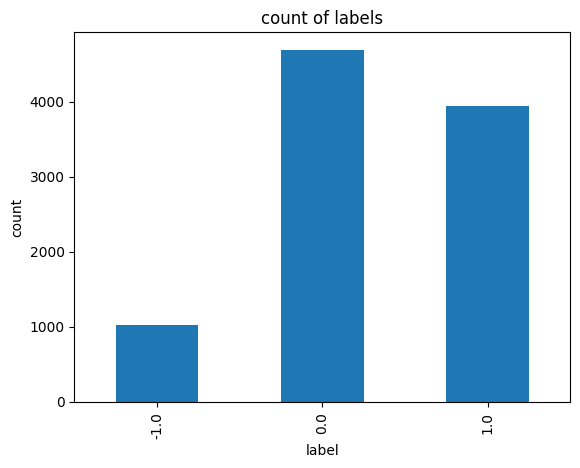

In [ ]:
# visualization of the label feature
fig_1= train_data['label'].value_counts().sort_index().plot(kind='bar', title= 'count of labels',xlabel= 'label', ylabel= 'count');
fig_1;


###1.3 Number of characters in a tweet

In [ ]:
train_data['characters_in_tweet']= train_data['tweet'].str.len()

In [ ]:
fig_2=px.histogram(data_frame=train_data , x= "characters_in_tweet", title= "Number of Characters Present in Tweet")
fig_2.show();

- from the visual, the highest number of characters in a tweet is 120

In [ ]:
train_data.head()

,id,tweet,label,agreement,characters_in_tweet
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,90
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,140
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,55
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,138
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,106


## 1.4. Length of a tweet

In [ ]:
train_data['tweet_length'] = train_data['tweet'].str.split().apply(len)
train_data.head()

,id,tweet,label,agreement,characters_in_tweet,tweet_length
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,90,15
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,140,25
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,55,7
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,138,28
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,106,20


In [ ]:
tweet_len=train_data['tweet_length'].value_counts().reset_index()
tweet_len.columns=['tweet_length','count']

In [ ]:
fig_3=px.scatter(data_frame= tweet_len, x='tweet_length', y= 'count',size='count', color= 'tweet_length')
fig_3.show()

- Most tweets are 18 words of length

In [ ]:
test_data['tweet_length'] = test_data['tweet'].str.split().apply(len)
test_data.head()

tweet_length=test_data['tweet_length'].value_counts().reset_index()
tweet_length.columns=['tweet_length','count']

In [ ]:
fig_3=px.scatter(data_frame= tweet_length, x='tweet_length', y= 'count',size='count', color= 'tweet_length')
fig_3.show()

- the most tweeted words are 18 word length

###1.5 stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

nltk.download('stopwords')  # Download stopwords corpus (run once)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Set of stopwords in English

    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)

    # Remove stopwords from the text
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a single string
    processed_text = ' '.join(filtered_words)

    return processed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Preprocessing

In [ ]:
test_data.columns

Index(['id', 'tweet', 'tweet_length'], dtype='object')

In [ ]:
train_data["clean_tweet"]=train_data['tweet'].apply(remove_stopwords)
test_data["clean_tweet"]= test_data['tweet'].apply(remove_stopwords)

In [ ]:
train_data.columns

Index(['id', 'tweet', 'label', 'agreement', 'characters_in_tweet',
       'tweet_length', 'clean_tweet'],
      dtype='object')

In [ ]:
##creating a fucntion to help us deal with punctuations
def punctuation_remover(text):
  return re.sub("[^\w\s]", repl= " ", string=text)

In [ ]:
 ##removing punctuations
train_data["clean_tweet"]= train_data["tweet"].apply(punctuation_remover)
test_data["clean_tweet"]= test_data["tweet"].apply(punctuation_remover)


In [ ]:
 # replace url
def replace_url(df,column):
    df_url = df[column].str.replace(r'http.?://[^\s]+[\s]?', 'urlweb ')
    return df_url
train_data['clean_tweet'] = replace_url(train_data,'clean_tweet')
test_data['clean_tweet'] = replace_url(test_data,'clean_tweet')

In [ ]:
# replace emojis
def replace_emoji(df,column):
    df_emoji = df[column].apply(lambda x: emoji.demojize(x)).apply(lambda x: re.sub(r':[a-z_&]+:','emoji ',x))
    return df_emoji
train_data['clean_tweet'] = replace_emoji(train_data,'clean_tweet')
test_data['clean_tweet'] = replace_emoji(test_data,'clean_tweet')

In [ ]:
# removing digits
def remove_digits(df,column):
    df_digits = df[column].apply(lambda x: re.sub(r'\d','',x))
    return df_digits
train_data['clean_tweet'] = remove_digits(train_data,'clean_tweet')
test_data['clean_tweet'] = remove_digits(test_data,'clean_tweet')

In [ ]:
# removing user
def word_remover(text):
  return " ".join([word for word in text.split() if word not in ["user"]])

In [ ]:
# Apply remove_word using lambda function
train_data["clean_tweet"]=train_data["clean_tweet"].apply(lambda x : word_remover(x))
test_data["clean_tweet"]=test_data["clean_tweet"].apply(lambda x: word_remover(x))

In [ ]:
# lowercasing
train_data["clean_tweet"]= train_data["clean_tweet"].str.lower()
test_data["clean_tweet"]= test_data["clean_tweet"].str.lower()

In [ ]:
train_data.head()

,id,tweet,label,agreement,characters_in_tweet,tweet_length,clean_tweet
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,90,15,me amp the big homie meanboy meanboy mb mbs mm...
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,140,25,i m thinking of devoting my career to proving ...
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,55,7,whatcausesautism vaccines do not vaccinate you...
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,138,28,i mean if they immunize my kid with something ...
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,106,20,thanks to catch me performing at la nuit nyc s...


In [ ]:
test_data.tail()

,id,tweet,tweet_length,clean_tweet
5056,ZXVVNC5O,jenny mccarthy is on new years rockin eve. wha...,24,jenny mccarthy is on new years rockin eve what...
5057,ZYIANVI8,Measles reported in Clark Co. for 1st time sin...,11,measles reported in clark co for st time since
5058,ZYITEHAH,<user> issues alert regarding Measles in TX. K...,15,issues alert regarding measles in tx keep your...
5059,ZZ3BMBTG,I can't believe people don't vaccinate their k...,16,i can t believe people don t vaccinate their k...
5060,ZZIYCVNH,"""<user> Alternatives to #Flu Vaccine <url> #n...",22,alternatives to flu vaccine natural health a g...


### stemming

In [ ]:
Strain_data['token'] = train_data['clean_tweet'].apply(lambda x: x.split())
test_data['token'] = test_data['clean_tweet'].apply(lambda x: x.split())
train_data['token'].head()

0    [me, amp, the, big, homie, meanboy, meanboy, m...
1    [i, m, thinking, of, devoting, my, career, to,...
2    [whatcausesautism, vaccines, do, not, vaccinat...
3    [i, mean, if, they, immunize, my, kid, with, s...
4    [thanks, to, catch, me, performing, at, la, nu...
Name: token, dtype: object

In [ ]:
# use stemming process on clean tweets
stemmer = PorterStemmer()

train_data['stemming'] = train_data['token'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
test_data['stemming'] = test_data['token'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
train_data['stemming'].head()

0    [me, amp, the, big, homi, meanboy, meanboy, mb...
1    [i, m, think, of, devot, my, career, to, prove...
2    [whatcausesaut, vaccin, do, not, vaccin, your,...
3    [i, mean, if, they, immun, my, kid, with, some...
4    [thank, to, catch, me, perform, at, la, nuit, ...
Name: stemming, dtype: object

In [ ]:
#check for stopwords in train
stemmer = PorterStemmer()
stop = stopwords.words('english')
train_data['stopwords'] = train_data['stemming'].apply(lambda x: len([i for i in x if i in stop]))
train_data[['stemming','stopwords']].head()

,stemming,stopwords
0,"[me, amp, the, big, homi, meanboy, meanboy, mb...",2
1,"[i, m, think, of, devot, my, career, to, prove...",13
2,"[whatcausesaut, vaccin, do, not, vaccin, your,...",3
3,"[i, mean, if, they, immun, my, kid, with, some...",22
4,"[thank, to, catch, me, perform, at, la, nuit, ...",4


### Most common words

In [ ]:
# Create corpus
result=[]
sublist= train_data['clean_tweet'].str.split()
sublist=sublist.values.tolist()
result=[word for i in sublist for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in result:
    if word in stop:
        dic[word]+=1

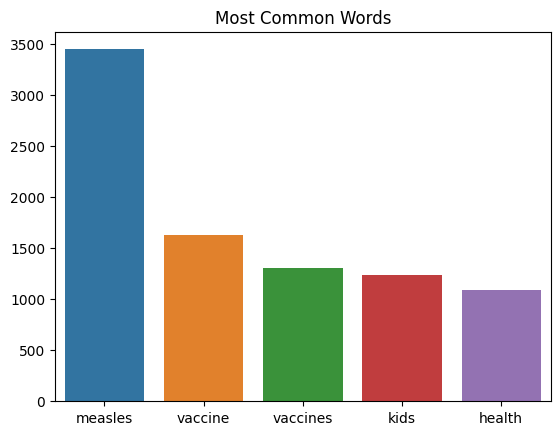

In [ ]:
counter=Counter(result)
most=counter.most_common()

x, y = [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=x,y=y)
plt.title('Most Common Words')
plt.show();

In [ ]:
train_tweets= train_data["clean_tweet"].dropna()

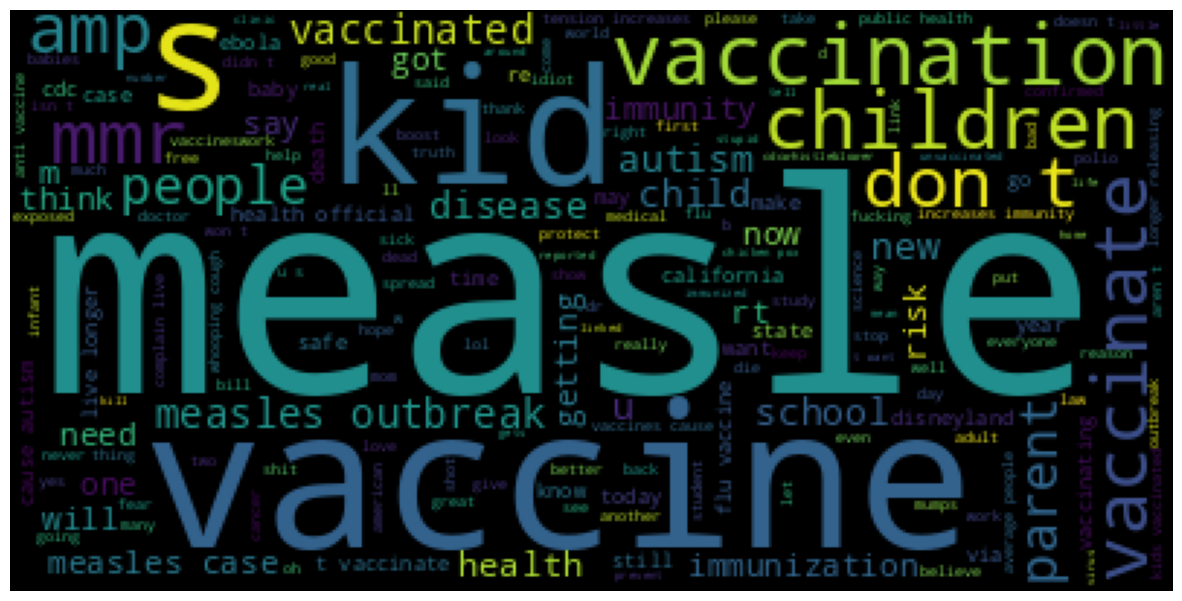

In [ ]:
##converting all textin various columns  into a single string
train_text= " ".join(train_tweets)
wc_train = WordCloud().generate(train_text)
plt.figure(figsize=(15, 10))
plt.imshow(wc_train)
plt.axis("off")
plt.show()


the most tweeted words are:
- Measles
- Outbreak
- Kid
- AMP
- Autism
- vaccinate
- MMR
- children
- immunization
- health
- parent


### performing lemmatizing

In [ ]:
def perform_lemmatization(text):
  lemmatizer = WordNetLemmatizer()
  tokens=nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
  processed_text = ' '.join(lemmatized_words)
  return processed_text


In [ ]:
nltk.download('wordnet')
train_data["clean_tweet"]=train_data['clean_tweet'].apply(perform_lemmatization)
test_data["clean_tweet"]= test_data['clean_tweet'].apply(perform_lemmatization)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
train_data.head()

,id,tweet,label,agreement,characters_in_tweet,tweet_length,clean_tweet,token,stemming,stopwords
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,90,15,me amp the big homie meanboy meanboy mb mb mmr...,"[me, amp, the, big, homie, meanboy, meanboy, m...","[me, amp, the, big, homi, meanboy, meanboy, mb...",2
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,140,25,i m thinking of devoting my career to proving ...,"[i, m, thinking, of, devoting, my, career, to,...","[i, m, think, of, devot, my, career, to, prove...",13
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,55,7,whatcausesautism vaccine do not vaccinate your...,"[whatcausesautism, vaccines, do, not, vaccinat...","[whatcausesaut, vaccin, do, not, vaccin, your,...",3
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,138,28,i mean if they immunize my kid with something ...,"[i, mean, if, they, immunize, my, kid, with, s...","[i, mean, if, they, immun, my, kid, with, some...",22
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,106,20,thanks to catch me performing at la nuit nyc s...,"[thanks, to, catch, me, performing, at, la, nu...","[thank, to, catch, me, perform, at, la, nuit, ...",4


### Applying Part-of-Speech tagging(POS tagging)

In [ ]:
def apply_pos_tagging(text):
  tokens = nltk.word_tokenize(text)
  pos_tags=nltk.pos_tag(tokens)
  return pos_tags

In [ ]:
nltk.download('averaged_perceptron_tagger')
train_data["clean_tweet"]=train_data['clean_tweet'].apply(apply_pos_tagging)
test_data["clean_tweet"]= test_data['clean_tweet'].apply(apply_pos_tagging)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
train_data=train_data.drop("tweet",axis=1)
test_data=test_data.drop("tweet",axis=1)
test_data.head()

,id,tweet_length,clean_tweet,token,stemming
0,00BHHHP1,20,"[(amp, VB), (a, DT), (vaccine, NN), (given, VB...","[amp, a, vaccine, given, healthy, peeps, fda, ...","[amp, a, vaccin, given, healthi, peep, fda, th..."
1,00UNMD0E,9,"[(student, NN), (starting, VBG), (school, NN),...","[students, starting, school, without, whooping...","[student, start, school, without, whoop, cough..."
2,01AXPTJF,19,"[(i, JJ), (m, VBP), (kinda, NN), (over, IN), (...","[i, m, kinda, over, every, ep, of, being, ripp...","[i, m, kinda, over, everi, ep, of, be, rip, fr..."
3,01HOEQJW,23,"[(how, WRB), (many, JJ), (innocent, JJ), (chil...","[how, many, innocent, children, die, for, lack...","[how, mani, innoc, children, die, for, lack, o..."
4,01JUKMAO,19,"[(cdc, NN), (eyeing, VBG), (bird, JJ), (flu, J...","[cdc, eyeing, bird, flu, vaccine, for, humans,...","[cdc, eye, bird, flu, vaccin, for, human, thou..."


In [ ]:
final_dataset = train_data.copy()
final_dataset.to_csv('final_dataset.csv', index=False)

In [ ]:
final_dataset = pd.read_csv('/content/final_dataset.csv')
final_dataset.head()

,id,label,agreement,characters_in_tweet,tweet_length,clean_tweet,token,stemming,stopwords
0,CL1KWCMY,0.0,1.0,90,15,"[('me', 'PRP'), ('amp', 'VBP'), ('the', 'DT'),...","['me', 'amp', 'the', 'big', 'homie', 'meanboy'...","['me', 'amp', 'the', 'big', 'homi', 'meanboy',...",2
1,E3303EME,1.0,1.0,140,25,"[('i', 'NN'), ('m', 'VBP'), ('thinking', 'NN')...","['i', 'm', 'thinking', 'of', 'devoting', 'my',...","['i', 'm', 'think', 'of', 'devot', 'my', 'care...",13
2,M4IVFSMS,-1.0,1.0,55,7,"[('whatcausesautism', 'NN'), ('vaccine', 'NN')...","['whatcausesautism', 'vaccines', 'do', 'not', ...","['whatcausesaut', 'vaccin', 'do', 'not', 'vacc...",3
3,1DR6ROZ4,-1.0,1.0,138,28,"[('i', 'JJ'), ('mean', 'VBP'), ('if', 'IN'), (...","['i', 'mean', 'if', 'they', 'immunize', 'my', ...","['i', 'mean', 'if', 'they', 'immun', 'my', 'ki...",22
4,J77ENIIE,0.0,1.0,106,20,"[('thanks', 'NNS'), ('to', 'TO'), ('catch', 'V...","['thanks', 'to', 'catch', 'me', 'performing', ...","['thank', 'to', 'catch', 'me', 'perform', 'at'...",4


In [ ]:
# Split the train data => {train, eval}
train, eval = train_test_split(final_dataset, test_size=0.2, random_state=42, stratify=final_dataset['label'])

In [ ]:
train.head()

,id,label,agreement,characters_in_tweet,tweet_length,clean_tweet,token,stemming,stopwords
1779,TN1UR9ZZ,0.0,1.000000,134,20,"[('wait', 'NN'), ('you', 'PRP'), ('mean', 'VBP...","['wait', 'you', 'mean', 'another', 'totally', ...","['wait', 'you', 'mean', 'anoth', 'total', 'pre...",7
1305,S1LRHP1O,0.0,1.000000,56,9,"[('damn', 'IN'), ('the', 'DT'), ('whole', 'JJ'...","['damn', 'the', 'whole', 'mmr', 'team', 'came'...","['damn', 'the', 'whole', 'mmr', 'team', 'came'...",2
4796,Y9YA5ZG1,0.0,0.666667,67,11,"[('good', 'JJ'), ('i', 'NN'), ('m', 'VBP'), ('...","['good', 'i', 'm', 'feeling', 'nostalgic', 'ab...","['good', 'i', 'm', 'feel', 'nostalg', 'about',...",4
6237,2GVOHR52,0.0,1.000000,20,5,"[('my', 'PRP$'), ('mmr', 'NN'), ('is', 'VBZ'),...","['my', 'mmr', 'is', 'trash', 'now']","['my', 'mmr', 'is', 'trash', 'now']",3
2667,YL1Z5HTW,1.0,0.666667,120,19,"[('is', 'VBZ'), ('wrapping', 'VBG'), ('up', 'R...","['is', 'wrapping', 'up', 'staff', 'flu', 'shot...","['is', 'wrap', 'up', 'staff', 'flu', 'shot', '...",5


In [ ]:
eval.head()

,id,label,agreement,characters_in_tweet,tweet_length,clean_tweet,token,stemming,stopwords
4355,ODWU5QUG,0.0,0.666667,127,21,"[('why', 'WRB'), ('are', 'VBP'), ('those', 'DT...","['why', 'are', 'those', 'born', 'before', 'con...","['whi', 'are', 'those', 'born', 'befor', 'cons...",7
9507,PIZOMVCE,-1.0,0.666667,60,10,"[('do', 'VB'), ('your', 'PRP$'), ('research', ...","['do', 'your', 'research', 'vaccines', 'can', ...","['do', 'your', 'research', 'vaccin', 'can', 'a...",5
4175,3T5C83NB,1.0,1.000000,117,20,"[('will', 'MD'), ('crazy', 'VB'), ('hippy', 'J...","['will', 'crazy', 'hippy', 'parents', 'please'...","['will', 'crazi', 'hippi', 'parent', 'pleas', ...",3
2164,RN0RRKUB,0.0,0.666667,101,20,"[('i', 'JJ'), ('start', 'VBP'), ('school', 'NN...","['i', 'start', 'school', 'in', 'days', 'and', ...","['i', 'start', 'school', 'in', 'day', 'and', '...",12
9304,BXQJJOCU,1.0,0.666667,109,18,"[('despicable', 'JJ'), ('katie', 'NN'), ('cour...","['despicable', 'katie', 'couric', 'casts', 'he...","['despic', 'kati', 'couric', 'cast', 'her', 'l...",6


In [ ]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (7724, 9), eval is (1932, 9)


In [ ]:
# Save splitted subsets
train.to_csv("/content/train_subset.csv", index=False)
eval.to_csv("/content/eval_subset.csv", index=False)

In [ ]:
# loading data into dataset
dataset = load_dataset('csv',
                        data_files={'train': '/content/train_subset.csv',
                        'eval': '/content/eval_subset.csv'}, encoding = "ISO-8859-1")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-18c15e9476ac16e3/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

I manually split the training set to have a training subset ( a dataset the model will learn on), and an evaluation subset ( a dataset the model with use to compute metric scores to help use to avoid some training problems like [the overfitting](https://www.ibm.com/cloud/learn/overfitting) one ).

There are multiple ways to do split the dataset. You'll see two commented line showing you another one.

In [ ]:
"""train.head()"""

Don't worry the above issue, it is a `KeyboardInterrupt` that means I stopped the training to avoid taking a long time to finish.

Some checkpoints of the model are automatically saved locally in `test_trainer/` during the training.

You may also upload the model on the Hugging Face Platform... [Read more](https://huggingface.co/docs/hub/models-uploading)

This notebook is inspired by an article: [Fine-Tuning Bert for Tweets Classification ft. Hugging Face](https://medium.com/mlearning-ai/fine-tuning-bert-for-tweets-classification-ft-hugging-face-8afebadd5dbf)

Do not hesitaite to read more and to ask questions, the Learning is a lifelong activity.